## Data exploration and preparation
This notebook is for exploring the dataset, its features and then doing the feature engineering part to obtain the final set of features.

## Libraries

In [2]:
import pandas as pd
import numpy as np

## Import the raw dataset

In [3]:
raw_path = "../data/raw/male_players.csv"
df_raw = pd.read_csv(raw_path)
df_raw.head()

/var/folders/b_/m2t7w7sd4cb_c94m0bktnymh0000gn/T/ipykernel_57124/2291339002.py:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(raw_path)


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [23]:
df_raw.dtypes

player_id                     int64
fifa_version                float64
fifa_update                 float64
update_as_of                 object
short_name                   object
long_name                    object
potential                     int64
value_eur                   float64
age                           int64
height_cm                     int64
weak_foot                     int64
international_reputation      int64
club_position                object
player_positions             object
pace                        float64
shooting                    float64
passing                     float64
dribbling                   float64
defending                   float64
physic                      float64
dtype: object

## Select the features
Based on the paper "Predict the Value of Football Players Using FIFA Video Game Data and Machine Learning Techniques" by M. A. Al-Asadi and S. Tasdemır, they worked with the FIFA 20 dataset and selected the features Age, Height, team_position, weak_foot, shooting, dribbling, passing, international_reputation and potential. In this case I'll add 3 more features from the main player attributes: pace, defending and physic and remove the team_position.

The **11 features** to work with are

Age

Height

weak_foot

shooting

dribbling

passing

pace

defending

physic

international_reputation 

potential

And the **target variable** is

value_eur

In [4]:
features_list = ["potential", "age", "height_cm", "weak_foot", "international_reputation", 
                 "pace", "shooting", "passing", "dribbling", "defending", "physic"]

target_list = ["value_eur"]

In [5]:
df_raw.club_position.unique()

array(['LW', 'ST', 'SUB', 'RF', 'RS', 'GK', 'RCM', 'LCB', 'LM', 'RW',
       'RDM', 'CAM', 'LCM', 'LS', 'RCB', 'RB', 'RES', 'CDM', 'RM', 'LB',
       'LF', 'CB', 'CM', 'LDM', 'CF', 'LAM', 'RWB', 'LWB', nan, 'RAM'],
      dtype=object)

In [6]:
subset = ["player_id", "fifa_version", "fifa_update", "update_as_of", "short_name", "long_name", "potential",
          "value_eur", "age", "height_cm", "weak_foot", "international_reputation", "club_position", "player_positions",
          "pace", "shooting", "passing", "dribbling", "defending", "physic"]

df_raw = df_raw[subset]

## Remove missing values
I'll remove the Goalkepers from this experiment, since they don't have values in the features "pace", "shooting", "passing", "dribbling", "defending", "physic".
Also, I'll remove all the rows where there are missing values.

In [7]:
df = df_raw[df_raw.player_positions != "GK"].dropna(axis=0)
df.shape

(158112, 20)

In [8]:
df_raw.shape

(180021, 20)

## Exploratory Data Analysis
In the paper, the authors mention that the target variable "value_eur", the price of the players, needs to be transformed with log in order to have a smoother distribution. Let's see that for ourselves.

<Axes: ylabel='Frequency'>

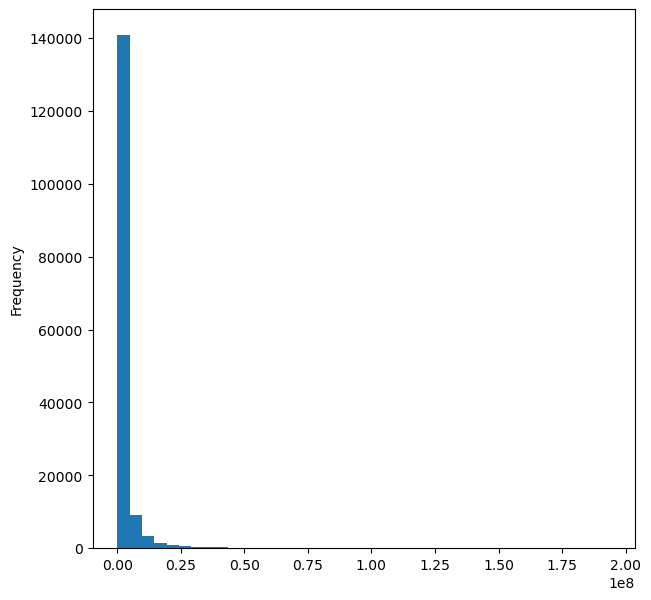

In [9]:
df.value_eur.plot(kind="hist", bins= 40 ,figsize=(7, 7))

<Axes: ylabel='Frequency'>

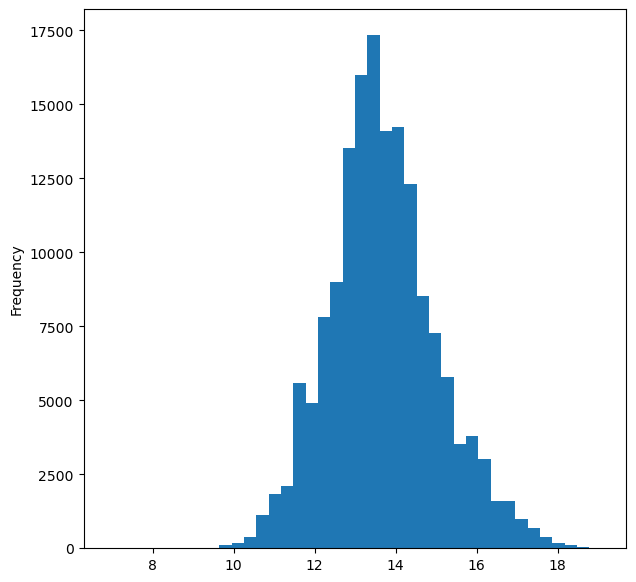

In [10]:
np.log(df.value_eur).plot(kind="hist", bins= 40 ,figsize=(7, 7))

In [11]:
df["value_eur_log"] = np.log(df.value_eur)

In [12]:
df.value_eur_log

0         19.016766
1         19.035866
2         18.450240
3         17.529083
4         17.747336
            ...    
180014    10.126631
180016     9.903488
180017    10.308953
180018     9.615805
180019     9.615805
Name: value_eur_log, Length: 158112, dtype: float64

In [13]:
df.columns

Index(['player_id', 'fifa_version', 'fifa_update', 'update_as_of',
       'short_name', 'long_name', 'potential', 'value_eur', 'age', 'height_cm',
       'weak_foot', 'international_reputation', 'club_position',
       'player_positions', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'value_eur_log'],
      dtype='object')

**NOTE:** One impotant thing to mention is that the inflation takes an effect on the prices. A player with the sames features wouldn't cost the same in 2015 and 2024. I'm not considering this effect in this experiment, it could be something to work later.

## Final dataframe with the features to be used

In [14]:
df.head()

,player_id,fifa_version,fifa_update,update_as_of,short_name,long_name,potential,value_eur,age,height_cm,...,international_reputation,club_position,player_positions,pace,shooting,passing,dribbling,defending,physic,value_eur_log
0,231747,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,94,181500000.0,24,182,...,5,LW,"ST, LW",97.0,90.0,80.0,92.0,36.0,78.0,19.016766
1,239085,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,94,185000000.0,22,195,...,5,ST,ST,89.0,93.0,66.0,80.0,45.0,88.0,19.035866
2,192985,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,91,103000000.0,32,181,...,5,SUB,"CM, CAM",72.0,88.0,94.0,87.0,65.0,78.0,18.450240
3,158023,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,90,41000000.0,36,169,...,5,RF,"CF, CAM",80.0,87.0,90.0,94.0,33.0,64.0,17.529083
4,165153,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,90,51000000.0,35,185,...,5,RS,"CF, ST",79.0,88.0,83.0,87.0,39.0,78.0,17.747336


In [15]:
df.isnull().any(axis=1).any()

False

In [21]:
required_columns =['player_id', 'fifa_version', 'fifa_update', 'update_as_of',
       'short_name', 'long_name', 'potential', 'value_eur', 'age', 'height_cm',
       'weak_foot', 'international_reputation', 'club_position',
       'player_positions', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'value_eur_log']

missing_columns = set(required_columns) - set(df.columns)
assert len(missing_columns) == 0, f"Missing required columns: {missing_columns}"